 Importing the Dependencies

In [29]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection & Processing

In [2]:
# load the data from csv file to pandas DataFrame
titanic_data=pd.read_csv('tested.csv')

In [3]:
# printing the first five row of the DataFrame
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#gttting some information about data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# check the number od missing value in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the Missing values

In [6]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin',axis=1)



In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [8]:
# replacing the missing value in "Age" column with mean value
titanic_data.loc[:, "Age"] =titanic_data['Age'].fillna(titanic_data['Age'].mean())


In [9]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [10]:
# fiding the mode value of"Fare" columns
print(titanic_data['Fare'].mode())


0    7.75
Name: Fare, dtype: float64


In [11]:
print(titanic_data['Fare'].mode()[0])

7.75


In [12]:
# replacing he missing value in 'Fare' column with mode value
titanic_data.loc[:, "Fare"] = titanic_data["Fare"].fillna(titanic_data['Fare'].mode()[0])


In [13]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [14]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
#findig number  of people survived and not survived
titanic_data['Survived'].value_counts()


Survived
0    266
1    152
Name: count, dtype: int64

Data Visualization 

In [16]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

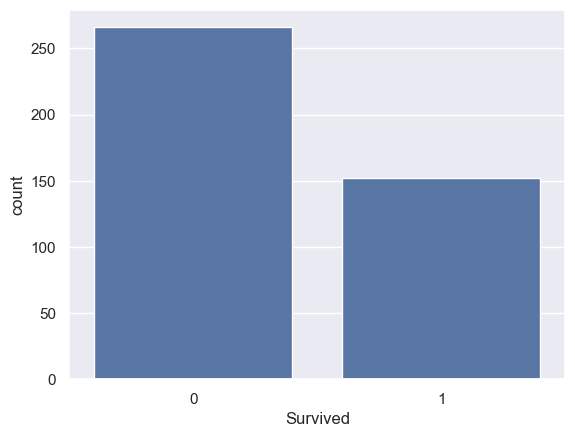

In [17]:
#making a count plot for 'survived' columnn
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

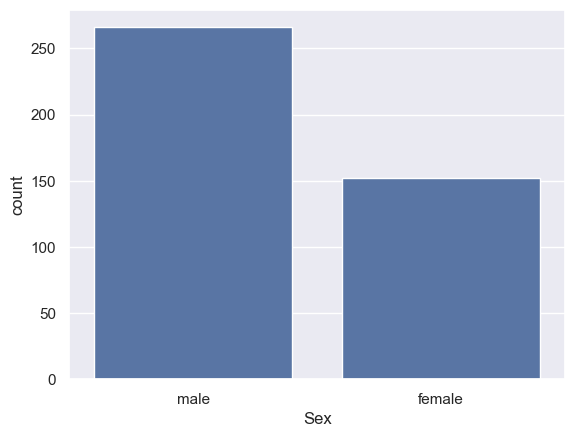

In [18]:
# makin count plot for 'sex' columns
sns.countplot(x='Sex',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

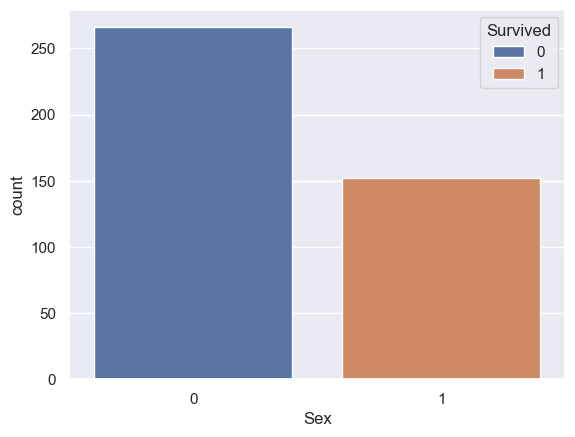

In [32]:
# number of survivors sex wise
sns.countplot(x='Sex',hue ='Survived' ,data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

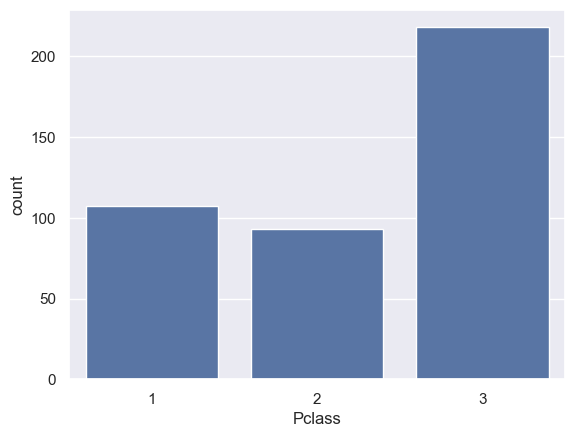

In [20]:
# makin count plot for 'pclass' columns
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

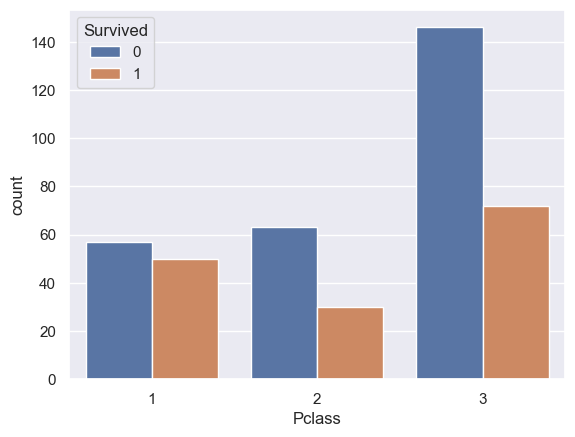

In [21]:
sns.countplot(x='Pclass',hue='Survived', data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

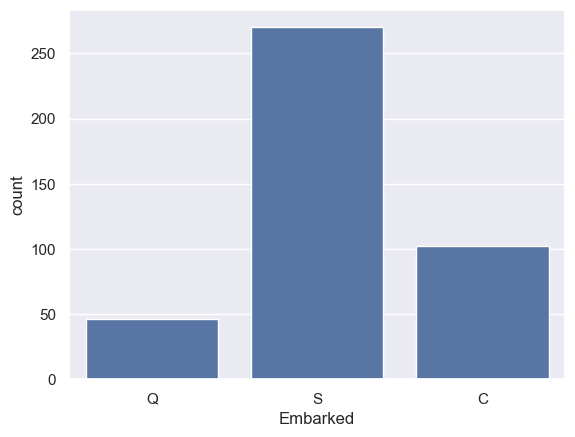

In [22]:
sns.countplot(x='Embarked',data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

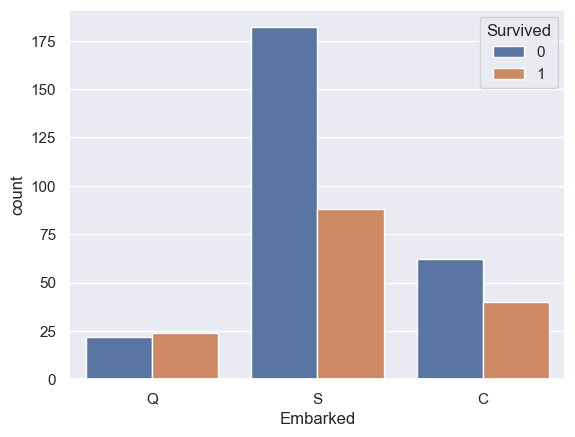

In [23]:
sns.countplot(x='Embarked',hue='Survived', data=titanic_data)

Encoding the catagorical column

In [24]:
titanic_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [25]:
titanic_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [26]:
# coverting categorical Columns

titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


C:\Users\mohit\AppData\Local\Temp\ipykernel_10728\259147577.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [27]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Seprating Features and target

In [28]:
x=titanic_data.drop(columns=['Name','PassengerId','Ticket','Survived'],axis=1)
y=titanic_data['Survived']

In [30]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [31]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting the Data into trainnig data & testing data

In [50]:
x_train, x_test , y_train ,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [51]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (376, 7) (42, 7)


Model Training

Logistic Regression

In [52]:
model=LogisticRegression()

In [53]:
 # training logistic regression model taining data
model.fit(x_train,y_train)

LogisticRegression()

Model Evaluation

Accuracy score

In [58]:
#accuracy on training data
x_train_prediction=model.predict(x_train)

In [55]:
print(x_train_prediction)

[0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 1]


In [63]:

taining_data_accuracy =accuracy_score(y_train,x_train_prediction)
print("Accuracy score tain data:",taining_data_accuracy)

Accuracy score tain data: 1.0


In [64]:
x_test_prediction=model.predict(x_test)

In [65]:
print(x_test_prediction)

[0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0]


In [67]:
test_data_accuracy =accuracy_score(y_test,x_test_prediction)
print("Accuracy score of test data:",test_data_accuracy)

Accuracy score of test data: 1.0
